# Portfolio Optimization

The objective of this project is to optimize an investor's portfolio by applying the concept of Efficient Frontier and using Python.

In [16]:
#Importing python libraries

from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Getting the stock tickers in the portfolio
Using FAANG stocks for this analysis (FAANG: 'FaceBook, Amazon, Apple, Netflix and Google')


In [17]:
#Using FAANG for this analysis
assets = ['FB','AMZN','AAPL','NFLX','GOOG']

## Assigning weights to the stocks.
To start we will assign equal weights to all the 5 porfolios mentioned above.
The sum of the weights must be equal to 1

In [18]:
weights = np.array([0.2,0.2,0.2,0.2,0.2]) #20% of our portfolio is in these companies

## Setting the portfolio start and end date

In [19]:
stockStartDate = '2013-01-01'
stockEndDate = datetime.today().strftime('%Y-%m-%d') #today
#stockEndDate

## Creating a dataframe to store the adjusted close price of the stocks

In [20]:
df = pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo',start=stockStartDate, end=stockEndDate)['Adj Close']

In [21]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823
...,...,...,...,...,...
2020-07-15,240.279999,3008.870117,390.899994,523.260010,1513.640015
2020-07-16,240.929993,2999.899902,386.089996,527.390015,1518.000000
2020-07-17,242.029999,2961.969971,385.309998,492.989990,1515.550049


## Visualization

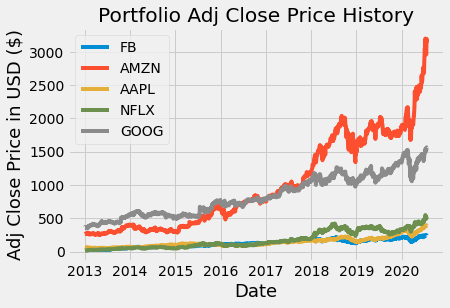

In [22]:
title = "Portfolio Adj Close Price History"

for i in df.columns.values:
  plt.plot(df[i], label = i)

plt.title(title)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close Price in USD ($)", fontsize=18)
plt.legend(df.columns.values, loc = 'upper left')
plt.show()

## Daily simple returns

In [23]:
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-07-15,0.002294,-0.024361,0.006877,-0.003086,-0.004564
2020-07-16,0.002705,-0.002981,-0.012305,0.007893,0.002880
2020-07-17,0.004566,-0.012644,-0.002020,-0.065227,-0.001614


## Annualized covariance matrix

In [24]:
annual_cov_matrix = returns.cov() * 252 #252 is the number of trading days in a year
annual_cov_matrix

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.116502,0.052439,0.041109,0.054741,0.049098
AMZN,0.052439,0.092734,0.036007,0.061834,0.046914
AAPL,0.041109,0.036007,0.076338,0.032107,0.037552
NFLX,0.054741,0.061834,0.032107,0.212979,0.049122
GOOG,0.049098,0.046914,0.037552,0.049122,0.064990


## Calculating the portfolio variance

In [26]:
var_portfolio = np.dot(weights.T, np.dot(annual_cov_matrix, weights))
var_portfolio

0.05941556955579194

## Portfolio volatility

In [28]:
vol_portfolio = np.sqrt(var_portfolio)
vol_portfolio

0.243753091376893

## Annual portfolio return

In [29]:
annual_port_return = np.sum(returns.mean()*weights) * 252
annual_port_return

0.3601532358697413

## Putting it together

In [31]:
percent_var = str(round(var_portfolio, 2)*100) + '%'
percent_vol = str(round(vol_portfolio, 2)*100) + '%'
percent_ret = str(round(annual_port_return, 2)*100) + '%'

print("Expected annual return:", percent_ret)
print("Annual volaility/risk:", percent_vol)
print("Annual variance:", percent_var)

Expected annual return: 36.0%
Annual volaility/risk: 24.0%
Annual variance: 6.0%


In [37]:
!pip install PyPortfolioOpt

# Importing the PyPortfolioOpt Library

In [33]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

## Portfolio Optimization

Calculate the expected returns and the annualized sample covariance matrix of asset returns

In [36]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df) #sample covariance matrix

#optimize foe maximum Sharpe Ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #maximizing the Sharpe ratio
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.12256), ('AMZN', 0.32576), ('AAPL', 0.23608), ('NFLX', 0.3156), ('GOOG', 0.0)])
Expected annual return: 41.3%
Annual volatility: 26.6%
Sharpe Ratio: 1.48


(0.4128782661406454, 0.266264727618757, 1.4755175034042662)

## Discrete allocation of each share per stock

In [41]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
dis_allocation = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 20000)
allocation, leftover = dis_allocation.lp_portfolio()
print("Discrete Allocation:", allocation)
print("Funds Remaining: ${: .2f}".format(leftover))

Discrete Allocation: {'FB': 11.0, 'AMZN': 2.0, 'AAPL': 12.0, 'NFLX': 13.0}
Funds Remaining: $ 2.32
